
**Problem Statement**

The objective of this analysis is to explore and understand the key factors impacting Airbnb property listings in an urban market, focusing on property type distribution, pricing patterns, host behaviors, and review trends. The goal is to uncover actionable insights that could improve listing performance, maximize occupancy, and enhance guest satisfaction within different neighborhoods.


**Import the required Libraries**

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read and View the Data**

In [11]:
#read the airbnb data
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

In [14]:
#read the airbnb data
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [15]:
#Information of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [16]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [17]:
#changing neighborhood group to brookln
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


**Cleaning the Data**

In [18]:
#dropping duplicate records
df.drop_duplicates(inplace = True)

In [19]:
#drop house rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis = 1, inplace = True)

In [20]:
# Inspect unique values in 'price' and 'service fee' to understand the data format
print("Unique values in 'price':")
print(df['price'].unique()[:80]) # Displaying first 50 unique values to avoid large output

print("\nUnique values in 'Service Fee':")
print(df['service fee'].unique()[:80]) # Displaying first 50 unique values to avoid large output

Unique values in 'price':
[ 966.  142.  620.  368.  204.  577.   71. 1060. 1018.  291.  319.  606.
  714.  580.  149.  578.  778.  656.  460. 1095.  281.  477.  133. 1050.
  816. 1175.  530.  274.  209.  432.  666.  770.  512.  858.  545.  191.
 1111.  203. 1097. 1020. 1010.  563.  370.  687.  856.   62.  435.  916.
  459.  363.  212.  728.  901.  335.  254.  903.  439. 1024.  658.  543.
  256.  294.  779.  653.  303.  825.  646. 1037.   87.  316.  735.  524.
  238.  603.  571.  398.  618.  116.   54.  744.]

Unique values in 'Service Fee':
[193.  28. 124.  74.  41. 115.  14. 212. 204.  58.  64. 121. 143. 116.
  30.  nan  56.  95.  27. 210. 163. 235. 106.  55.  42.  86. 133. 154.
 102. 172. 109.  38. 222. 219. 202. 113. 137. 171.  12.  87. 183.  92.
  73. 146. 180.  67.  51. 181.  88. 205. 132.  59. 156. 131.  61. 165.
 129. 207.  17.  63. 147. 105.  48. 114.  80.  23.  11. 149. 213. 211.
 182. 117.  39.  25. 216.  53.  10. 118.  72.  76.]


In [21]:
# remove all dollar signs and commas in price and service fee and convert to numeric
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Convert price and service fee to numeric, coercing errors
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')

#rename the columns
df.rename(columns = {
    'price': 'price_$',
    'service fee': 'service_fee_$'}, inplace = True)

#dropping all records with missing values
df.dropna(inplace = True)

In [22]:
#change all mismatched datatypes to appropriate types
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(int)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

In [23]:
#correct spelling of brookln to brooklyn
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'brooklyn'

In [24]:
#get rid of outliers in availbility column
df = df.drop(df[df['availability 365']> 500].index)

In [25]:
df.duplicated().value_counts()

,count
False,83389


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  int64         
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

**Exploratory Data Analysis**

In [27]:
df.describe()

,id,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,8.338900e+04,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,2.957590e+07,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,1.001254e+06,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.541637e+07,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,3.075760e+07,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,4.331856e+07,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,1.621857e+07,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [28]:
# what are the different property types in dataset
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Property types and their count in dataset')

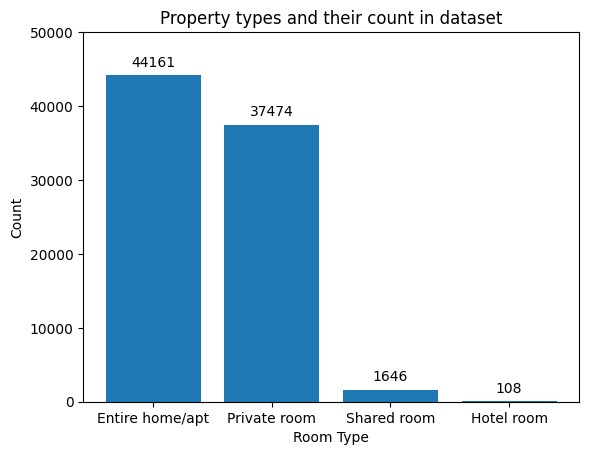

In [29]:
#room type count plot on bar chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,'count']);
plt.bar_label(room_type_bar, labels = property_types.loc[:, 'count'], padding = 4);
plt.ylim([0, 50000]);
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Property types and their count in dataset')

**which neighborhood group has the highest number of listings?**

In [30]:
# which neighborhood group has the highest number of listings?

# Correct the spelling and capitalization of 'brooklyn' in the 'neighbourhood group' column
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln', 'Brooklyn')
df['neighbourhood group'] = df['neighbourhood group'].replace('brooklyn', 'Brooklyn')

# Recalculate the neighborhood group counts after correcting the inconsistency
neighborhood_group_count = df['neighbourhood group'].value_counts().to_frame()
display(neighborhood_group_count)

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


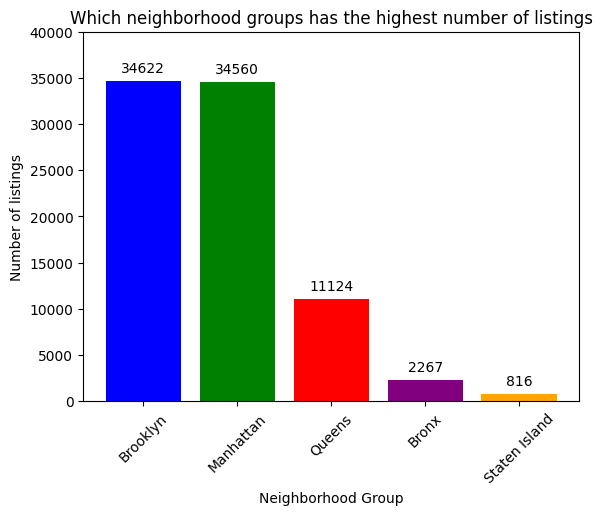

In [31]:
#visualizing the same through bar plot
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown'] # Define a list of colors
neighborhood_group_count_bar = plt.bar(neighborhood_group_count.index, neighborhood_group_count.loc[:,'count'], color=colors); # Use the color argument
plt.bar_label(neighborhood_group_count_bar, labels = neighborhood_group_count.loc[:, 'count'], padding = 4);
plt.ylim([0, 40000])
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of listings')
plt.xticks(rotation = 45);
plt.title('Which neighborhood groups has the highest number of listings');

**which Neighbourhood group has the highest average pices for Airbnb listings**

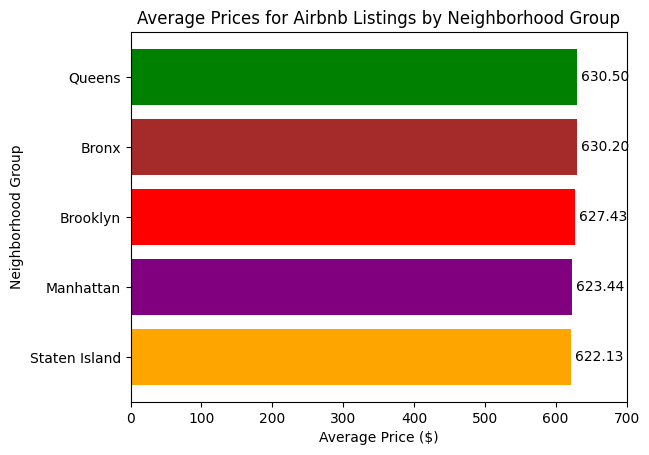

In [38]:
# Which neighborhood group has the highest average prices for Airbnb listings (Horizontal Bar)
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False)  # Calculate and sort average price
colors = ['green', 'brown','red', 'purple', 'orange']  # Define a list of colors
# Create a horizontal bar plot
avg_price_bar = plt.barh(avg_price.index, avg_price.values, color=colors)
# Add value labels next to the bars
for i, (value, name) in enumerate(zip(avg_price.values, avg_price.index)):
    plt.text(value + 5, i, f'{value:.2f}', va='center')
plt.xlim([0, 700])
plt.ylabel('Neighborhood Group')
plt.xlabel('Average Price ($)')
plt.title('Average Prices for Airbnb Listings by Neighborhood Group')
plt.gca().invert_yaxis()  # Invert Y-axis to show the highest average at the top
plt.show()


**Is there a relationship between the construction year of property and price?**

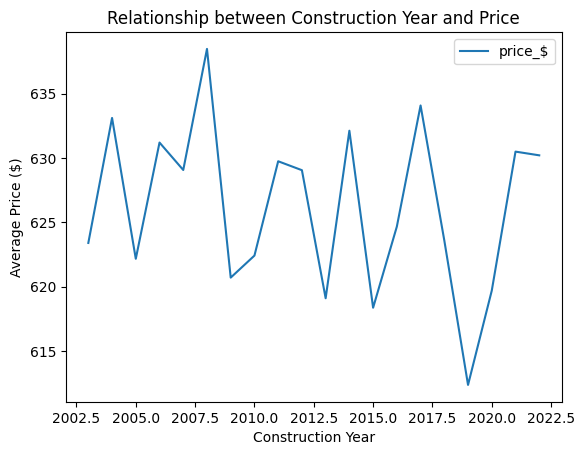

In [33]:
# is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot(kind = 'line')
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Relationship between Construction Year and Price');

**Top 10 hosts by calculated host listing count?**

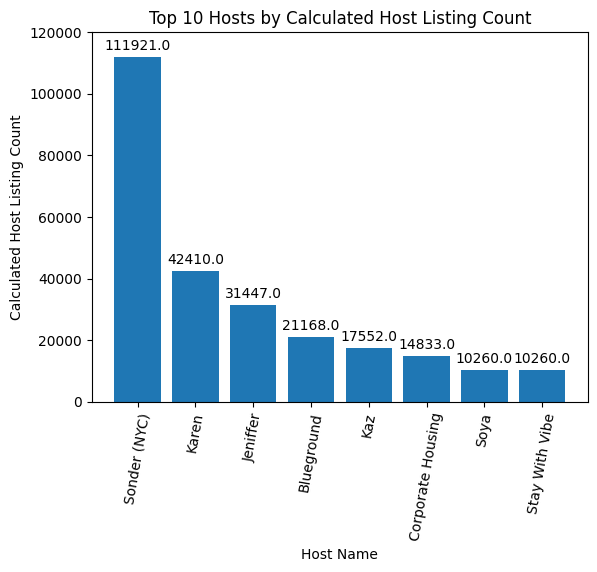

In [40]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False)[:8].to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, labels = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listing Count')
plt.xticks(rotation = 80);
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listing Count');

**Hosts with verified identifies more likely to receive positive reviews**

In [48]:
# Hosts with verified identifies more likely to receive positive reviews?
reviews = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
reviews

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


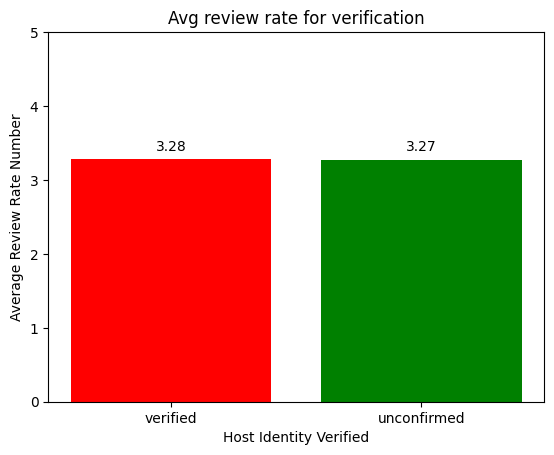

In [50]:
# visualizing the same through bar chart
colors = ['red','green'] # Define a list of colors for verified and unconfirmed
reviews_bar =  plt.bar(reviews.index, reviews.loc[:,'review rate number'], color=colors);
plt.bar_label(reviews_bar, labels = round(reviews.loc[:, 'review rate number'], 2), padding = 4);
plt.ylim([0, 5])
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Review Rate Number')
plt.title('Avg review rate for verification');

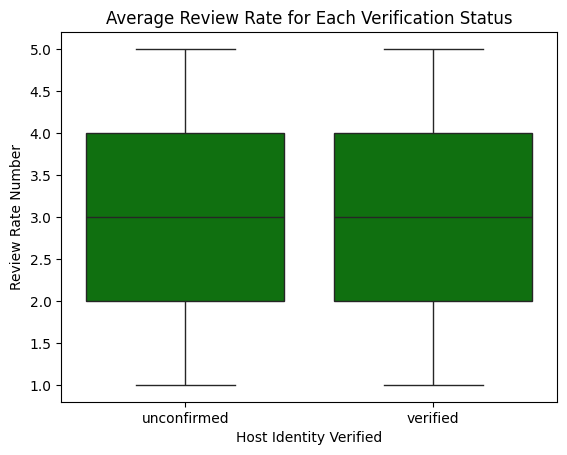

In [53]:
# Checking with box plot
sns.boxplot(data=df, x='host_identity_verified', y='review rate number', color='green')
plt.xlabel('Host Identity Verified')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for Each Verification Status')
plt.show()

**is there a correlation between the price of a listing and its service fee?**

In [54]:
# is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909082976466)

Text(0.5, 1.0, 'Correlation (a regression plot) between Price and Service Fee')

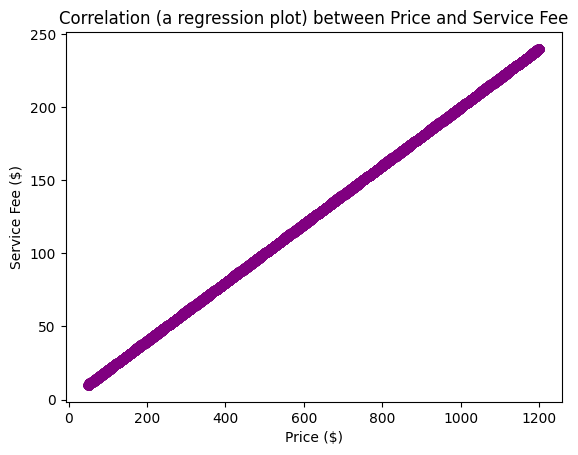

In [55]:
#plotting to check the correlation
sns.regplot(df, x = 'price_$', y = 'service_fee_$', color = 'purple');
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Correlation (a regression plot) between Price and Service Fee')

**Avg review rate number(eg.stars) for listings, and does it vary based on neighborhood group and room type**

In [56]:
# what its avg review rate number(eg.stars) for listings, and does it vary based on neighborhood group and room type?
avgreviewrate = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
avgreviewrate

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

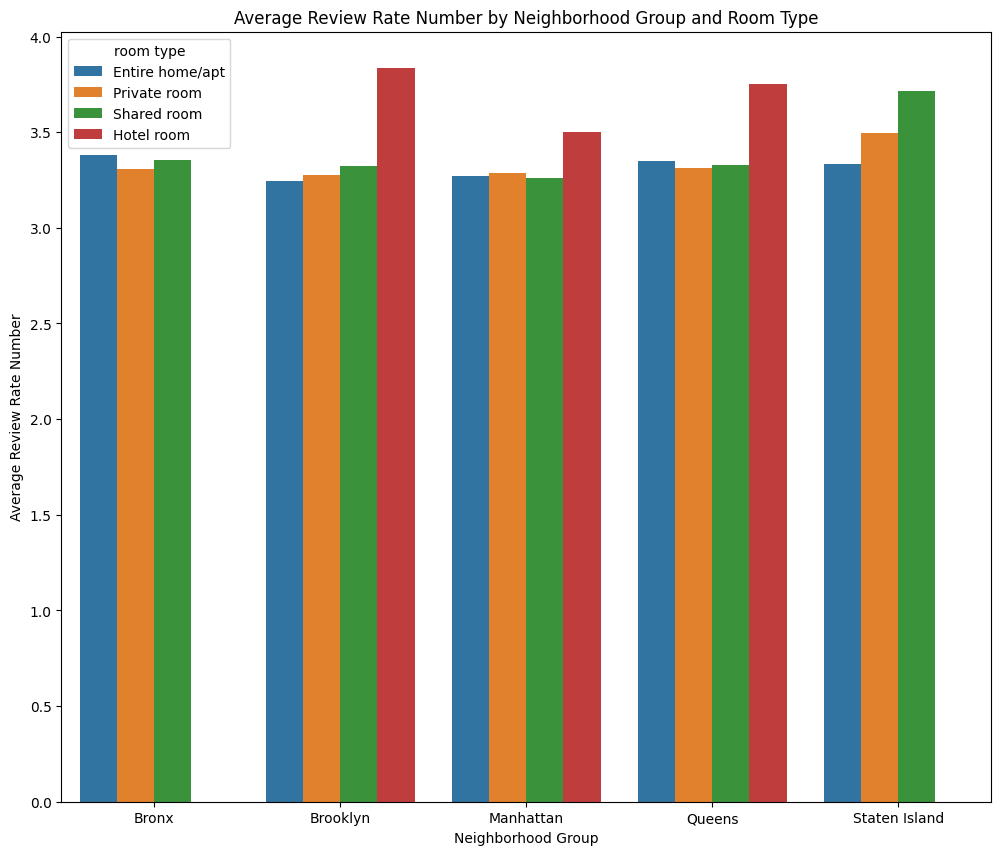

In [57]:
#using grouped bar chart
plt.figure(figsize = (12, 10));
sns.barplot(data = avgreviewrate.reset_index(), x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number by Neighborhood Group and Room Type');

**hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year**

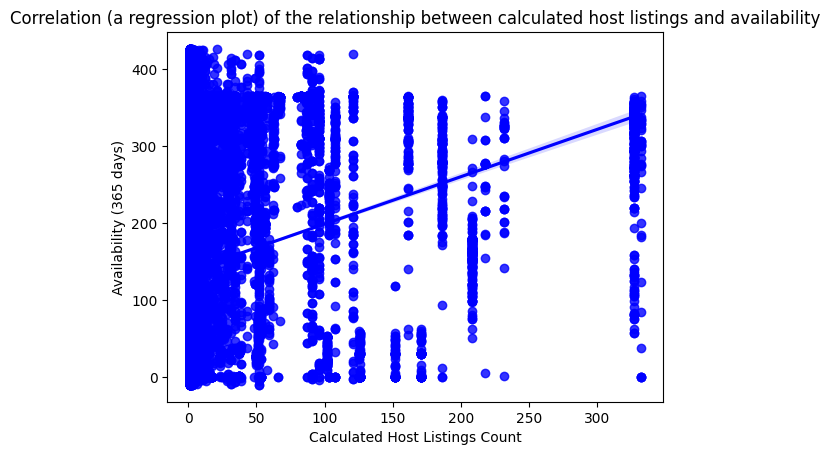

In [61]:
# are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365', color = 'blue');
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (365 days)')
plt.title('Correlation (a regression plot) of the relationship between calculated host listings and availability');

In [59]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359971471570339)

**Conclusion**

*   The dataset exhibits a diverse array of property types, accommodating a wide spectrum of guest preferences and travel requirements.

*    The highest average listing prices are concentrated within select premium neighborhood groups, signifying localized demand for upscale accommodation options.

*    Certain neighborhood groups possess a disproportionately large share of listings, indicating their prominence as preferred travel destinations and reflecting a higher concentration of active hosts.

*    A moderate association is observed between the year of property construction and the listing price, suggesting that newer properties may command higher rates, though the trend is not uniformly consistent.

*    A substantial proportion of listings have accumulated over 100 reviews, demonstrating strong guest engagement and frequent booking activity.

*    The top ten hosts, as determined by the number of active listings, are likely professional property managers or high-volume hosts, exerting a notable influence on overall market dynamics.

*    Hosts with verified identities tend to receive more favorable reviews, underscoring the significance of trust and transparency in fostering positive guest-host relationships.

*    A discernible, albeit moderate, correlation exists between listing price and service fee, wherein higher-priced listings generally incur proportionally greater service charges.

*    Average review ratings vary across neighborhoods and room types, suggesting that both geographic location and property characteristics influence guest satisfaction and overall experience.

*    Hosts managing a larger portfolio of listings typically exhibit higher availability rates, likely attributable to professional management practices and optimized booking strategies.




